In [5]:
import sys
sys.path.append(r"D:\\ME-master\\ME-master")
import MEbatch_hs
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(profile):
  
    plt.title('sample spectrum')
  
    
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.plot(profile[i])
        

Параметр mu - третье значение в векторе константных параметров. Он равняется косинусу угла между нормалью атмосферы и лучом зрения. В отличие от двух других, константых для всей области, он меняется от пикселя к пикселю. При этом его поиск в инверсии не требуется - он может быть найден сразу из геометрии.

In [25]:
wl0 = 6302.5
g = 2.5
mu = 1

line_vector = [6302.5, 2.5, 1]
param_vector = np.array([1000, 150, 30, 20, 1, 20, 10000, 10000, 0, 1, 0])

In [26]:
argument = np.linspace(6302.0692255, 6303.2544205, 56)
line_arg = 1000*(argument - wl0)

Параметр оказывает влияние и на интенсивность континуума и на профиль линии:

In [17]:
profile = MEbatch_hs.ME_ff(line_vector, param_vector, line_arg)

In [27]:
profile2 = MEbatch_hs.ME_ff([6302.5, 2.5, 0.7], param_vector, line_arg)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


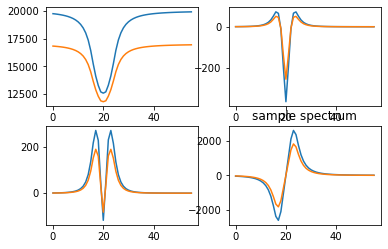

In [28]:
plot_spectrum(profile[0].T)
plot_spectrum(profile2[0].T)

Спектр с меньшим mu проходит через большую толщину атмосферы и сильнее затухает.

Даже после нормировки на интенсивность спектры различаются:

In [29]:
cont1 = 10000 + 10000
cont2 = 10000 + 0.7*10000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


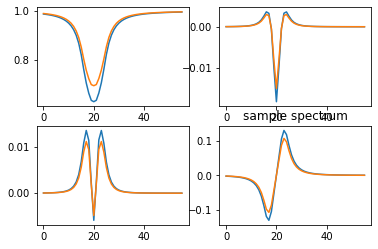

In [30]:
plot_spectrum(profile[0].T/cont1)
plot_spectrum(profile2[0].T/cont2)

Возможно, влияние этого фактора может быть отброшено для областей в центре диска. Даже значение 0,7 соответствует уже долготе в 45 градусов. С другой стороны, у того же Hinode анализ проводится и для окололимбовых областей.

Если передача параметра во входе формы (224, 1) понятна - там его можно просто сконкатенировать ко входу, то непонятно, как его вставить во вход (56, 4), используемый в сверточной сети